In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.decomposition import PCA 


In [2]:
data=pd.read_csv("C:\\Users\\Yousef Hanna\\Desktop\\github_gomycode\\CC GENERAL.csv")

In [3]:
data.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7114,C17307,44.631790,0.909091,582.60,0.00,582.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,3000.0,854.151780,149.201617,0.545455,12
4725,C14854,2651.484926,1.000000,908.15,0.00,908.15,1008.639756,1.000000,0.000000,1.000000,0.333333,9,23,3000.0,4361.679346,943.468960,0.083333,12
3246,C13340,1166.660018,1.000000,2452.69,1541.69,911.00,0.000000,0.666667,0.416667,0.416667,0.000000,0,13,1500.0,1259.605630,271.109376,0.083333,12
1980,C12043,2675.418129,1.000000,55.00,55.00,0.00,315.402389,0.083333,0.083333,0.000000,0.250000,3,1,3000.0,579.527874,1323.695647,0.000000,12
1419,C11467,0.001214,0.181818,0.00,0.00,0.00,39.610415,0.000000,0.000000,0.000000,0.083333,1,0,7500.0,231.081616,0.117036,0.000000,12
8471,C18701,839.081567,0.727273,0.00,0.00,0.00,609.463327,0.000000,0.000000,0.000000,0.416667,6,0,1800.0,2719.934613,406.996136,0.125000,12
6928,C17117,574.416538,0.909091,376.20,0.00,376.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,24,1500.0,1100.109444,228.565068,0.000000,12
6198,C16371,3006.295536,1.000000,1430.24,50.00,1380.24,0.000000,1.000000,0.083333,1.000000,0.000000,0,92,3000.0,2034.512438,3337.263197,0.000000,12
8288,C18509,997.781043,1.000000,0.00,0.00,0.00,56.553047,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,729.644957,347.033488,0.000000,12
7609,C17815,83.030075,1.000000,2298.89,567.55,1731.34,0.000000,0.916667,0.166667,0.833333,0.000000,0,22,1000.0,2034.589917,166.237338,1.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mode()[0],inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode()[0],inplace=True)

In [7]:
print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [8]:
data = data.drop(["CUST_ID"], axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

###### affinitystr or callable, default=’euclidean’, Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

##### n_clustersint or None, default=2 The number of clusters to find. It must be None if distance_threshold is not None.

In [10]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [11]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

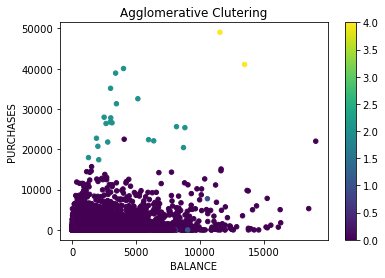

In [12]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=20)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [141]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [142]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [143]:
labels.value_counts()

0    6527
1    2292
2     131
dtype: int64

In [144]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[8.55753626e+02 8.54436868e-01 6.06054710e+02 3.14167415e+02
  2.92185668e+02 4.95892245e+02 4.68032456e-01 1.54413824e-01
  3.52656892e-01 1.06807914e-01 2.25417241e+00 1.06900934e+01
  2.75058545e+03 9.99873123e+02 5.61591872e+02 1.57074116e-01
  1.14337774e+01]
 [3.40173346e+03 9.40583815e-01 1.58123830e+03 9.87705905e+02
  5.93845306e+02 2.11634462e+03 5.39346598e-01 3.17087692e-01
  3.84604944e-01 2.10822215e-01 5.74868881e+00 2.21280594e+01
  9.01516807e+03 2.88949147e+03 1.55745206e+03 1.33859512e-01
  1.17373252e+01]
 [4.80882923e+03 9.09847656e-01 1.07073796e+04 7.56195397e+03
  3.14559359e+03 5.19105119e+03 7.47270397e-01 5.95595015e-01
  5.99510939e-01 2.26083061e-01 9.17557252e+00 8.55496183e+01
  1.24660305e+04 1.80939666e+04 2.49345210e+03 3.33011382e-01
  1.18396947e+01]]


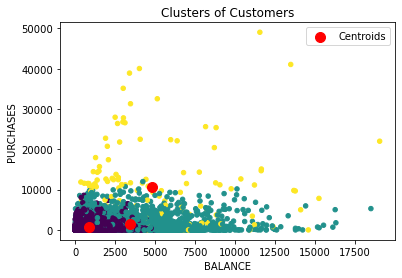

In [145]:
plt.scatter(data["BALANCE"],          
            data["PURCHASES"],s=20,c=labels[:])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

# PCA

In [135]:
pca_t = PCA(2)
pca_t.fit(data)
pca_result = pca_t.transform(data)

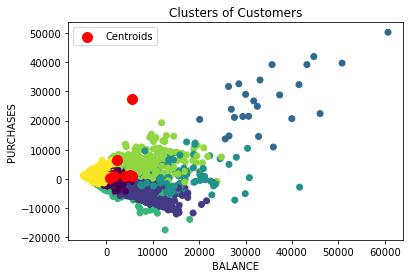

In [134]:
plt.scatter(pca_result[:,0],pca_result[:,1], c=labels[:] )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [121]:
ssd = []
K = range(1,18)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(data)
    ssd.append(km.inertia_)
    

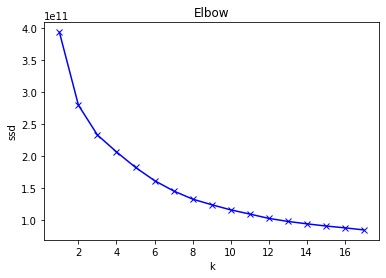

In [122]:
plt.plot(K,ssd,'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow')
plt.show()